In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")
merged_df = pd.read_csv("data/merged_df.csv")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,[1038818],['Consumer loans'],[9251.775],[179055.0],[179055.0],[0.0],[179055.0],['SATURDAY'],[9],['Y'],[1],[0.0],[nan],[nan],['XAP'],['Approved'],[-606],['XNA'],['XAP'],[nan],['New'],['Vehicles'],['POS'],

In [7]:
merged_df.shape

(307511, 158)

In [101]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [12]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY_list', 'CNT_PAYMENT_list',
       'NAME_YIELD_GROUP_list', 'PRODUCT_COMBINATION_list',
       'DAYS_FIRST_DRAWING_list', 'DAYS_FIRST_DUE_list',
       'DAYS_LAST_DUE_1ST_VERSION_list', 'DAYS_LAST_DUE_list',
       'DAYS_TERMINATION_list', 'NFLAG_INSURED_ON_APPROVAL_list'],
      dtype='object', length=158)

In [79]:
merged_df.iloc[:,41:80].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI
0,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083
1,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292
2,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,0.650,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,0.323,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [16]:
merged_df.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'TOTALAREA_MODE'],axis=1).iloc[:,41:80].head()

,EXT_SOURCE_3,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list
0,0.139,No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,[1038818],['Consumer loans'],[9251.775],[179055.0],[179055.0],[0.0]
1,nan,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,"[1810518, 2636178, 2396755]","['Cash loans', 'Consumer loans', 'Consumer loans']","[98356.995, 64567.665, 6737.31]","[900000.0, 337500.0, 68809.5]","[1035882.0, 348637.5, 68053.5]","[nan, 0.0, 6885.0]"
2,0.730,NaN,0.000,0.000,0.000,0.000,-815.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,[1564014],['Consumer loans'],[5357.25],[24282.0],[20106.0],[4860.0]
3,nan,NaN,2.000,0.000,2.000,0.000,-617.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,"[2078043, 2827850, 2190416, 1489396, 1020698, 1243599, 2299329, 2545789, 1697039]","['Cash loans', 'Revolving loans', 'Consumer loans', 'Revolving loans', 'Cash loans', 'Cash loans', 'Consumer loans', 'Cash loans', 'Cash loans']","[24246.0, nan, 29027.52, 13500.0, 39954.51, nan, 2482.92, nan, 32696.1]","[675000.0, 0.0, 334917.0, 270000.0, 454500.0, 0.0, 26912.34, 0.0, 688500.0]","[675000.0, 0.0, 267930.0, 270000.0, 481495.5, 0.0, 24219.0, 0.0, 906615.0]","[nan, nan, 66987.0, nan, nan, nan, 2693.34, nan, nan]"
4,nan,NaN,0.000,0.000,0.000,0.000,"-1,106.000",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,"[2001242, 2730157, 1692033, 2119973, 2462742, 1940724]","['Cash loans', 'Cash loans', 'Cash loans', 'Consumer loans', 'Consumer loans', 'Cash loans']","[16509.6, 13010.985, 16037.64, 1834.29, 3601.53, 22678.785]","[180000.0, 225000.0, 247500.0, 17176.5, 31005.0, 202500.0]","[180000.0, 284400.0, 274288.5, 14616.0, 30663.0, 215865.0]","[nan, nan, nan, 3676.5, 3105.0, nan]"


In [22]:
merged_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.000      163910
1.000       48783
2.000       29808
3.000       20322
4.000       14143
5.000        9553
6.000        6453
7.000        4390
8.000        2967
9.000        2003
10.000       1376
11.000        852
12.000        652
13.000        411
14.000        258
15.000        166
16.000        133
17.000         88
18.000         46
19.000         44
20.000         30
21.000         29
22.000         22
23.000         15
24.000         11
25.000         11
27.000          5
26.000          3
30.000          2
28.000          1
348.000         1
29.000          1
47.000          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [23]:
corr = merged_df.corr()

<AxesSubplot:>

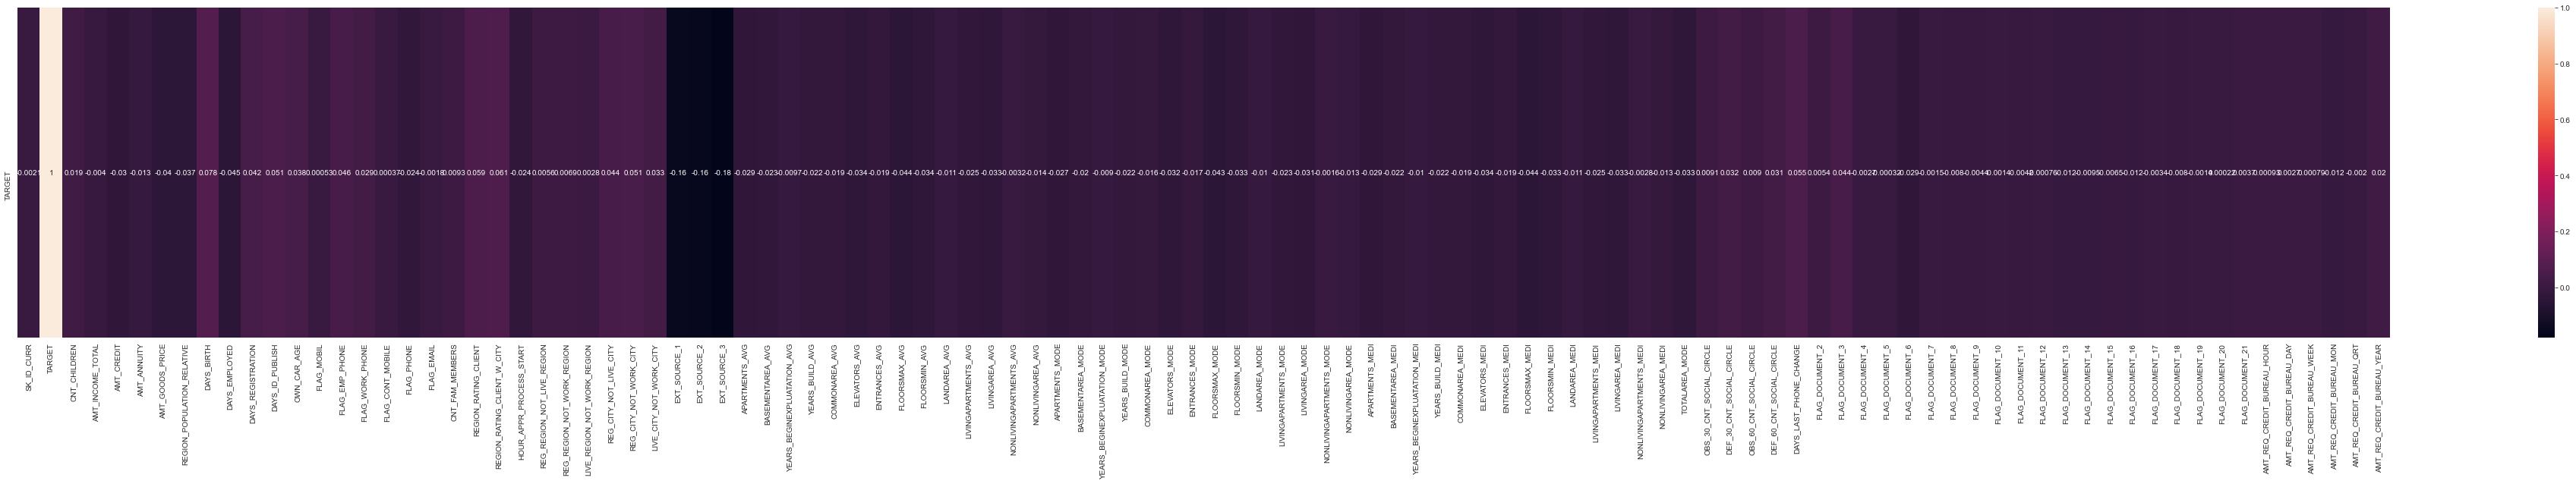

In [38]:
plt.figure(figsize=(70,8))
sns.heatmap(corr[['TARGET']].T,annot=True)

In [54]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper = upper.stack().reset_index().sort_values(0,ascending=False)
upper

,level_0,level_1,0
3078,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998
5072,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998
3418,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997
3352,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997
3285,ENTRANCES_AVG,ENTRANCES_MEDI,0.997
...,...,...,...
726,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,-0.533
1420,FLAG_EMP_PHONE,FLAG_DOCUMENT_6,-0.598
832,DAYS_BIRTH,EXT_SOURCE_1,-0.601
812,DAYS_BIRTH,DAYS_EMPLOYED,-0.616


In [80]:
target_corr =  corr[['TARGET']]
target_corr[target_corr['TARGET']>0].sort_values('TARGET',ascending=False)

,TARGET
TARGET,1.000
DAYS_BIRTH,0.078
REGION_RATING_CLIENT_W_CITY,0.061
REGION_RATING_CLIENT,0.059
DAYS_LAST_PHONE_CHANGE,0.055
DAYS_ID_PUBLISH,0.051
REG_CITY_NOT_WORK_CITY,0.051
FLAG_EMP_PHONE,0.046
REG_CITY_NOT_LIVE_CITY,0.044
FLAG_DOCUMENT_3,0.044


In [82]:
target_corr[target_corr['TARGET']<0].sort_values('TARGET')

,TARGET
EXT_SOURCE_3,-0.179
EXT_SOURCE_2,-0.160
EXT_SOURCE_1,-0.155
DAYS_EMPLOYED,-0.045
FLOORSMAX_AVG,-0.044
FLOORSMAX_MEDI,-0.044
FLOORSMAX_MODE,-0.043
AMT_GOODS_PRICE,-0.040
REGION_POPULATION_RELATIVE,-0.037
ELEVATORS_AVG,-0.034


<AxesSubplot:>

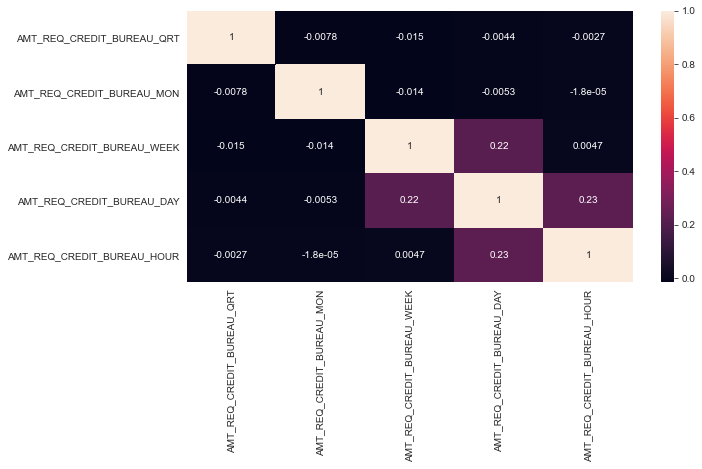

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(merged_df[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']].corr(),annot=True)

## Total no of phone numbers provided

<AxesSubplot:>

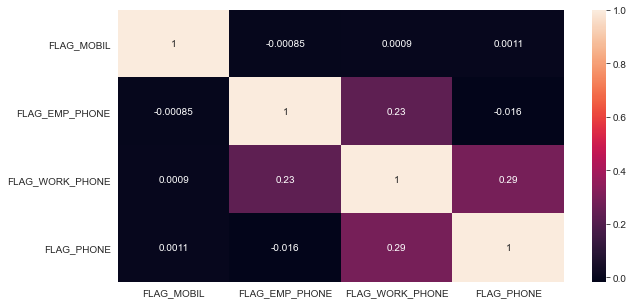

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(merged_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']].corr(),annot=True)

In [7]:
merged_df['TOTAL_PHONE_NUMBERS_PROVIDED'] = merged_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                                                       'FLAG_PHONE']].sum(axis=1)
merged_df['TOTAL_PHONE_NUMBERS_PROVIDED'].describe()

count   307,511.000
mean          2.300
std           0.825
min           1.000
25%           2.000
50%           2.000
75%           3.000
max           4.000
Name: TOTAL_PHONE_NUMBERS_PROVIDED, dtype: float64

In [8]:
a = merged_df.groupby(['TOTAL_PHONE_NUMBERS_PROVIDED','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(merged_df)*100).reset_index()['SK_ID_CURR']
a

,TOTAL_PHONE_NUMBERS_PROVIDED,TOTALCOUNT,DEFAULTER_RATES
0,1,12.670,5.664
1,2,55.494,8.366
2,3,20.969,8.500
3,4,10.867,8.559


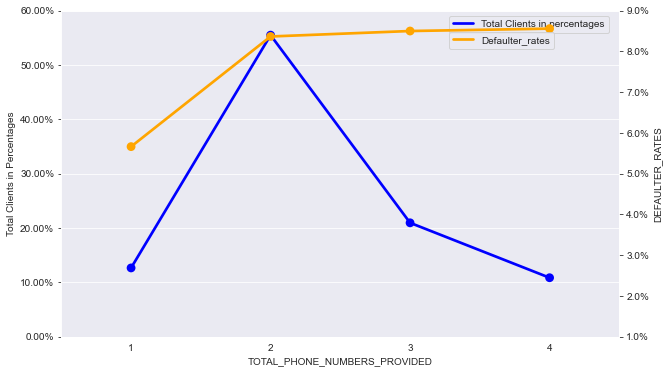

In [99]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='TOTAL_PHONE_NUMBERS_PROVIDED',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,60))
ax2 = ax1.twinx()


sns.pointplot(x='TOTAL_PHONE_NUMBERS_PROVIDED',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(1,9))
ax2.grid(None)

plt.show()

### Correlation

In [9]:
merged_df['TOTAL_PHONE_NUMBERS_PROVIDED'].corr(merged_df['TARGET'])

0.022257686121545526

## Contract Types of previous loans

In [13]:
merged_df['NAME_CONTRACT_TYPE_y_list'].iloc[1]

"['Cash loans', 'Consumer loans', 'Consumer loans']"

In [49]:
import json,ast
x = merged_df['NAME_CONTRACT_TYPE_y_list'].iloc[1]
x
#json.loads(x)
set(ast.literal_eval(x))

{'Cash loans', 'Consumer loans'}

In [29]:
set(['Cash Loans','Revolving Loans','Revolving Loans'])

{'Cash Loans', 'Revolving Loans'}

In [67]:
merged_df['NAME_CONTRACT_TYPE_y_list'].dropna(inplace=True)

In [69]:
merged_df['NAME_CONTRACT_TYPE_y_list'] = merged_df['NAME_CONTRACT_TYPE_y_list'].apply(lambda x:ast.literal_eval(x))

In [80]:
merged_df['NAME_CONTRACT_TYPE_y_list'].apply(lambda x:set(x))

TypeError: 'float' object is not iterable

In [77]:
set(merged_df['NAME_CONTRACT_TYPE_y_list'].iloc[:2])

TypeError: unhashable type: 'list'